In [1]:
# Set to false if you are not running
# this notebook in Google Colaboratory
run_on_colab = True

if(run_on_colab):
 from google.colab import drive
 # This will prompt for authorization.
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install music21;
!pip install tensorflow
!pip install pretty_midi
!pip install keras
from music21 import converter, instrument, note, chord, stream, midi
import glob
import pickle
import numpy
import os
import pretty_midi
import shutil 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from music21 import converter, instrument, note, chord, stream
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
cd /content/drive/'My Drive'/LSTM_MIDI/JAVIER/'Tratamiento de datos'/

/content/drive/My Drive/LSTM_MIDI/JAVIER/Tratamiento de datos


In [4]:
ls

MIDI_FILES/         Tratamientodatos.ipynb
note_to_int.pickle  Tratamientodatos_Luis.ipynb


In [5]:
with open('note_to_int.pickle', 'rb') as input1:
    note_to_int = pickle.load(input1)

# Vamos a probar con solo con los BOW de dos estilos

In [6]:

Data1 = pd.DataFrame(columns = ['Genre','Vector'])
for i,file in enumerate(glob.glob("MIDI_FILES/*/*.mid")):
  
  # MEJOR DEJAR FILE y luego NO usar FILE en el bucle de abajo
  
  #name = file
  genre = 0
  notes1 = []
  note_2_key = []
  BOW = numpy.zeros(len(note_to_int))
  midi = converter.parse(file)

  ## lee género
  if 'R&B:Soul' in file:
    #genre = 1
    continue
  elif 'Country' in file:
    genre = 2
  elif 'Popular' in file:
    #genre = 3
    continue
  elif 'Jazz' in file:
    genre = 4
    continue
  elif 'Classic' in file:
    genre = 5
    
  ## parsear todas las notas de una cancion en un archivo
  notes_to_parse = midi.flat.notes
  for element in notes_to_parse:
    if isinstance(element, note.Note):
      notes1.append(str(element.pitch))
    elif isinstance(element, chord.Chord):
      notes1.append('.'.join(str(n) for n in element.normalOrder))
      
  ## aplico el diccionario
  # AQUI MEJOR que file usar noteCode, por ejemplo...
  for _,noteCode in enumerate(notes1):
    for key, value in note_to_int.copy().items():
      if noteCode == key:
        note_2_key.append(value)
        BOW[value] += 1
  Data1 = Data1.append({'Genre' : genre ,'Vector' : BOW}, ignore_index=True)

 


MIDI_FILES/Popular/B_Witched_-_Cest_La_Vie.mid
MIDI_FILES/Popular/Captain_and_Tenille_-_The_Way_I_Want_To_Touch_You.mid
MIDI_FILES/Popular/Celine_Dion_-_To_Love_You_More.mid
MIDI_FILES/Popular/Backstreet_Boys_-_I_Want_It_That_Way.mid
MIDI_FILES/Popular/Delmore_Brothers_-_.mid
MIDI_FILES/Popular/Bruno_Mars_-_when_i_was_your_man.mid
MIDI_FILES/Popular/Captain_and_Tenille_-_You_Never_Done_It_Like_That.mid
MIDI_FILES/Popular/A-Teens_-_Mama_Mia.mid
MIDI_FILES/Popular/TheCloserIGetToYou.mid
MIDI_FILES/Popular/Alan_O_Day_-_Undercover_Angel.mid
MIDI_FILES/Popular/All_Saints_-_Never_Ever.mid
MIDI_FILES/Popular/ABBA_-_Money_Money_Money.mid
MIDI_FILES/Popular/Carly_Simon_-_Attitude_Dancing.mid
MIDI_FILES/Popular/my same - adele.mid
MIDI_FILES/Popular/The_Corrs_-_Queen_of_Hollywood.mid
MIDI_FILES/Popular/Stupid little things - Anastacia.mid
MIDI_FILES/Popular/The_Association_-_Never_My_Love.mid
MIDI_FILES/Popular/BB_Mak_-_Back_Here.mid
MIDI_FILES/Popular/Ace_of_Base_-_The_Sign.mid
MIDI_FILES/Popul

In [39]:
Data1.head(5)

,Genre,Vector
0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [77]:
from scipy.spatial import distance

BOW_Country = Data1[Data1['Genre']==2]['Vector']
BOW_Classic = Data1[Data1['Genre']==5]['Vector']

In [78]:
print('no. Country; ',BOW_Country.size, ' no. Classic: ', BOW_Classic.size)

no. Country;  77  no. Classic:  75


In [79]:
BOW_dist =  np.empty((BOW_Country.size, BOW_Classic.size))

for i in range(0,BOW_Country.size):
  for j in range(0,BOW_Classic.size):
    BOW_dist[i,j] = distance.cosine(BOW_Country.iloc[i,],BOW_Classic.iloc[j,])

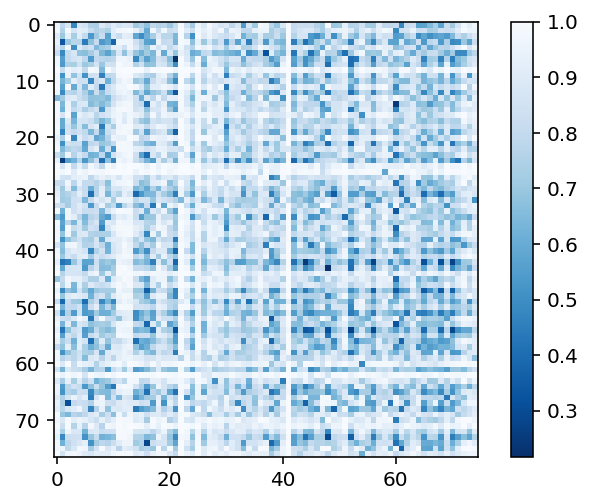

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

color_map = plt.imshow(BOW_dist)
color_map.set_cmap("Blues_r")
plt.colorbar()


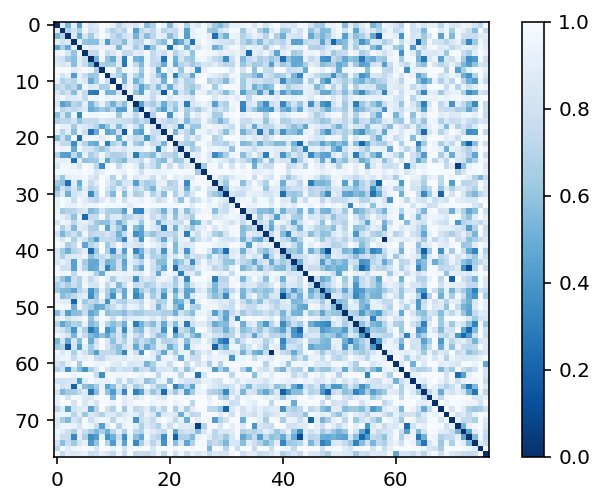

In [82]:
BOW_dist =  np.empty((BOW_Coutry.size, BOW_Country.size))

for i in range(0,BOW_Country.size):
  for j in range(0,BOW_Country.size):
    BOW_dist[i,j] = distance.cosine(BOW_Country.iloc[i,],BOW_Country.iloc[j,])

color_map = plt.imshow(BOW_dist)
color_map.set_cmap("Blues_r")
plt.colorbar()

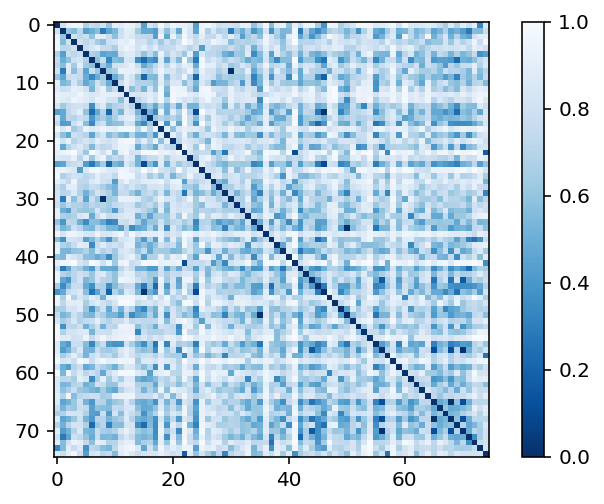

In [83]:
BOW_dist =  np.empty((BOW_Classic.size, BOW_Classic.size))

for i in range(0,BOW_Classic.size):
  for j in range(0,BOW_Classic.size):
    BOW_dist[i,j] = distance.cosine(BOW_Classic.iloc[i,],BOW_Classic.iloc[j,])

color_map = plt.imshow(BOW_dist)
color_map.set_cmap("Blues_r")
plt.colorbar()